**CS3MIR Lab 10 Deep Learning - Understanding CNN Layers & Parameters**


In this lab, we will create a simple Convolutional Neural Network (CNN), understand how the layers and filter works and will use CIFAR images for training and classification. Similar to Lab 9, this tutorial uses the Keras Sequential API for creating and training the model.

IMPORT TENSORFLOW

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Let's Create the convolutional base, similar to one in Lab 9

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3). You can do this by passing the argument input_shape to your first layer.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 8), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

Let's display the architecture of your model:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 25, 32)        2336      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 10, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 3, 64)          36928     
                                                                 
Total params: 57,760
Trainable params: 57,760
Non-trai

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

Let's dig deep into Activation Shape, Size and Parameters

Consider the following CNN arhiecture:

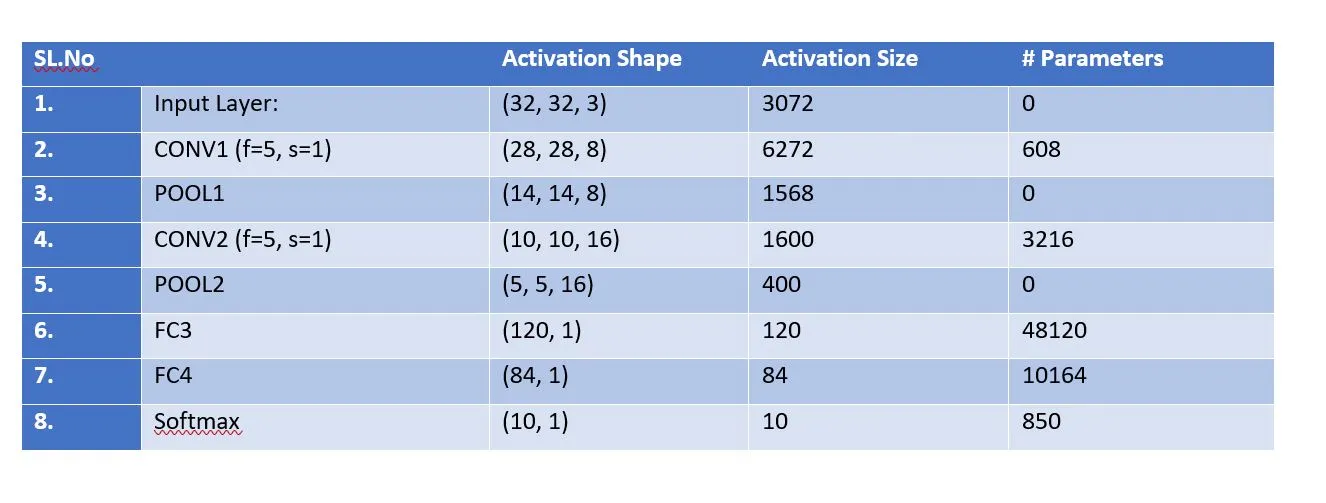

If you’ve been playing with CNN’s it is common to encounter a summary of parameters as seen in the above image. It is very easy to calculate the activation size, considering it’s merely the product of width, height and the number of channels in that layer.

For example, as shown in the above image from coursera, the input layer’s shape is (32, 32, 3), the activation size of that layer is 32 * 32 * 3 = 3072. The same holds good if you want to calculate the activation shape of any other layer. Say, we want to calculate the activation size for CONV2. All we have to do is just multiply (10,10,16) , i.e 10*10*16 = 1600, and you’re done calculating the activation size.

**How does a CNN learn?**

This goes back to the idea of understanding what we are doing with a convolution neural network, which is basically trying to learn the values of filter(s) using backprop. In other words, if a layer has weight matrices, that is a “learnable” layer.

Basically, the number of parameters in a given layer is the count of “learnable” elements for a filter aka parameters for the filter for that layer.

Parameters in general are weights that are learnt during training. They are weight matrices that contribute to model’s predictive power, changed during back-propagation process. Who governs the change? Well, the training algorithm you choose, particularly the optimization strategy makes them change their values.

Now that you know what “parameters” are, let’s dive into calculating the number of parameters in the sample image we saw above.

**Calculations**


1.   Input layer: Input layer has nothing to learn, at it’s core, what it does is just provide the input image’s shape. So no learnable parameters here. Thus number of parameters = 0.
2.   CONV layer: This is where CNN learns, so certainly we’ll have weight matrices. To calculate the learnable parameters here, all we have to do is just multiply the by the shape of width m, height n, previous layer’s filters d and account for all such filters k in the current layer. Don’t forget the bias term for each of the filter. Number of parameters in a CONV layer would be : ((m * n * d)+1)* k), added 1 because of the bias term for each filter. The same expression can be written as follows: ((shape of width of the filter * shape of height of the filter * number of filters in the previous layer+1)*number of filters). Where the term “filter” refer to the number of filters in the current layer.
3.   POOL layer: This has got no learnable parameters because all it does is calculate a specific number, no backprop learning involved! Thus number of parameters = 0.
4.   Bacth Norm Layer: Batch normalization is a layer that allows every layer of the network to do learning more independently. It is used to normalize the output of the previous layers. The activations scale the input layer in normalization. **The activations from the previous layer are simply the inputs to this layer**. It is often placed after the convolution and pooling layers.
5.   Fully Connected Layer (FC): This certainly has learnable parameters, matter of fact, in comparison to the other layers, this category of layers has the highest number of parameters, why? because, every neuron is connected to every other neuron! So, how to calculate the number of parameters here? You probably know, it is the product of the number of neurons in the current layer c and the number of neurons on the previous layer p and as always, do not forget the bias term. Thus number of parameters here are: ((current layer neurons c * previous layer neurons p)+1*c).

Now let’s follow these pointers and calculate the number of parameters:




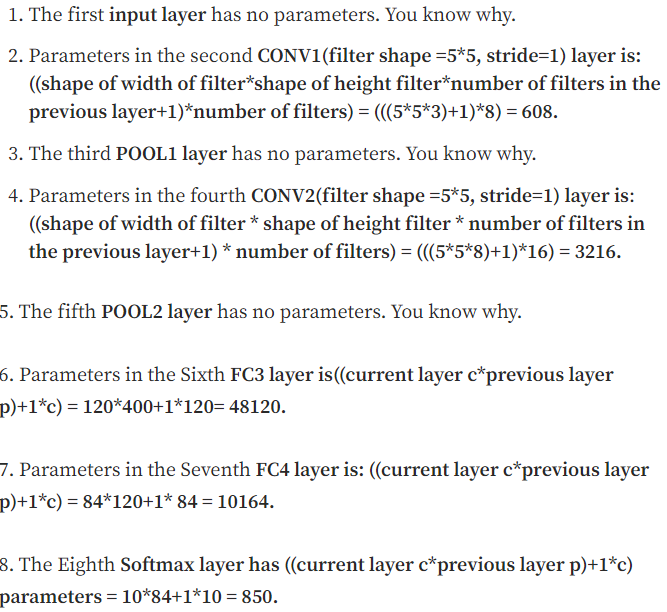

**Another Example**

Consider the following convolutional neural network defined by the layers in the left column below. Fill in the shape of the output volume and the number of parameters at each layer. You can write the activation shapes in the format (H, W, C), where H, W, C are the height, width and channel dimensions, respectively. Unless specified, assume padding 1, stride 1 where appropriate. 
Notation: 
 
*   CONVx-N denotes a convolutional layer with N filters with height and width equal to x.
*   POOL-n denotes a n×n max-pooling layer with stride of n and 0 padding.
*   FLATTEN flattens its inputs
*   FC-N denotes a fully-connected layer with N neurons

 





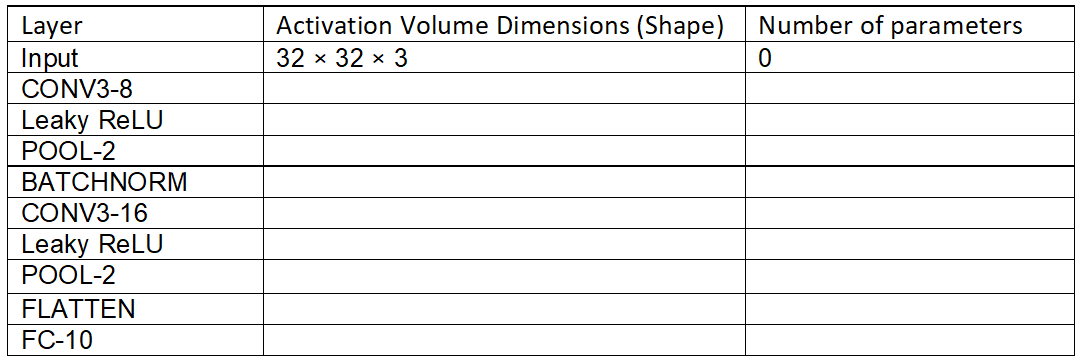

**Solution**

Please see the solution on Blackboard -> week 10 exercise 